# Explore here

In [215]:
# BASICAS
import pandas as pd
import numpy as np

# VISUALIZACION
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import chi2, SelectKBest

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump

In [216]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
# data.to_csv("../data/raw/data.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [217]:
# Tamaño de mis datos
data.shape

(768, 9)

In [218]:
# Informacion general de mis datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**INFORMACIÓN GENERAL DE MIS DATOS**

Mi dataset se conforma de 768 datos dsitribuidos en 9 columnas, no presenta valores faltantes en ninguna de ellas y observamos que todas las variables son de tipo numérica excepto la que vamos a predecir: "Outcome", que expresa con "0" negativo en diabetes y "1", positivo.

In [219]:
# Búsqueda de duplicados
data.duplicated().sum()
# NO PRESENTA DATOS DUPLICADOS

np.int64(0)

In [220]:
# Selección de atributos relevantes
# POR AHORA SE MANTIENEN TODOS LOS ATRIBUTOS HASTA ANALISIS POSTERIORES

In [221]:
# ANÁLISIS DE VARIABLES CATEGÓRICAS
data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

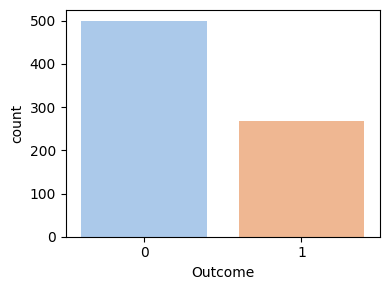

In [222]:
plt.figure(figsize=(4, 3))
sns.countplot(data = data, x = "Outcome", palette='pastel', hue= "Outcome", legend=False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

**ANÁLSIS GRÁFICO DE VARIABLES CATEGÓRICAS**

La variable objetivo "Outcome" se distribuye en más de un 60 % en el valor "0" (Personas negativas en diabetes) y el resto en "1" (Personas positivas en diabetes)

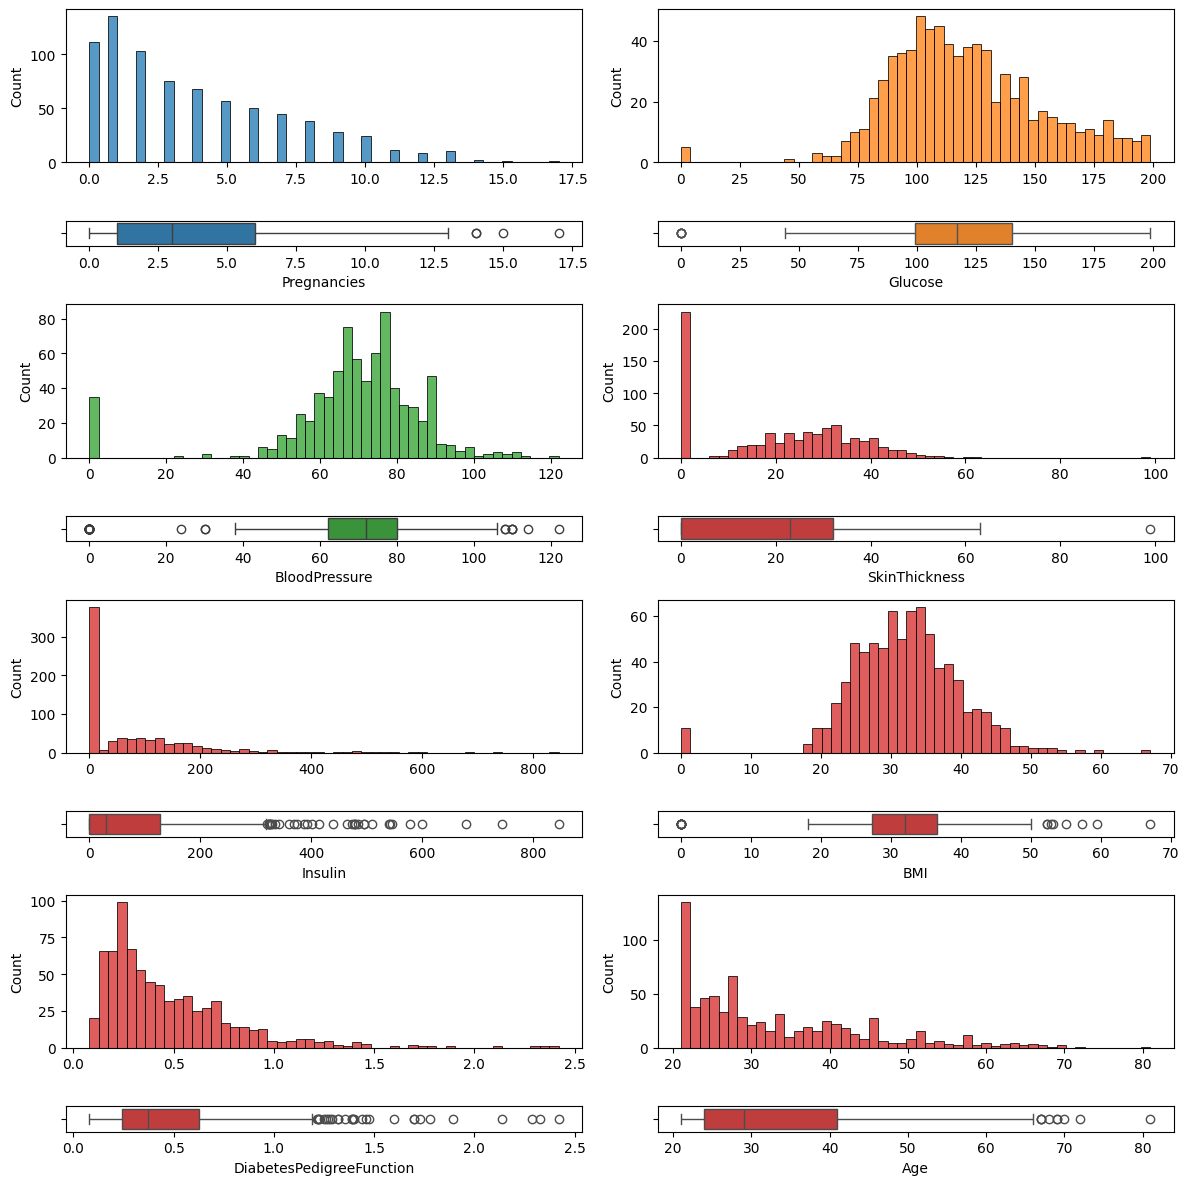

In [223]:
# ANÁLISIS DE VARIABLES NUMÉRICAS
# ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
fig, axis = plt.subplots(8, 2, figsize = (12, 12), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
# Pregnancies
sns.histplot(ax = axis[0, 0], data = data, x = "Pregnancies", bins=50, color="#1f77b4").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "Pregnancies", color="#1f77b4").set(xlabel = "Pregnancies")

# Glucose
sns.histplot(ax = axis[0, 1], data = data, x = "Glucose", bins=50, color="#ff7f0e").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "Glucose", color="#ff7f0e").set(xlabel = "Glucose")

# BloodPressure
sns.histplot(ax = axis[2, 0], data = data, x = "BloodPressure", bins=50, color="#2ca02c").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = data, x = "BloodPressure", color="#2ca02c").set(xlabel = "BloodPressure")

# SkinThickness
sns.histplot(ax = axis[2, 1], data = data, x = "SkinThickness", bins=50, color="#d62728").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = data, x = "SkinThickness", color="#d62728").set(xlabel = "SkinThickness")

# Insulin
sns.histplot(ax = axis[4, 0], data = data, x = "Insulin", bins=50, color="#d62728").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = data, x = "Insulin", color="#d62728").set(xlabel = "Insulin")

# BMI
sns.histplot(ax = axis[4, 1], data = data, x = "BMI", bins=50, color="#d62728").set(xlabel = None)
sns.boxplot(ax = axis[5, 1], data = data, x = "BMI", color="#d62728").set(xlabel = "BMI")

# DiabetesPedigreeFunction
sns.histplot(ax = axis[6, 0], data = data, x = "DiabetesPedigreeFunction", bins=50, color="#d62728").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = data, x = "DiabetesPedigreeFunction", color="#d62728").set(xlabel = "DiabetesPedigreeFunction")

# Age
sns.histplot(ax = axis[6, 1], data = data, x = "Age", bins=50, color="#d62728").set(xlabel = None)
sns.boxplot(ax = axis[7, 1], data = data, x = "Age", color="#d62728").set(xlabel = "Age")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

**ANÁLISIS GRÁFICO DE VARIABLES NUMÉRICAS**

- `Pregnancies` : Variable discreta con mayor volumen de datos entre 0 y 5, presenta unos pocos valores extremos que llegan hasta 17, tratándose de número de embarazos del paciente puede ser raro pero no imposible, por tanto no los consideraré errores de datos y por ahora se mantienen dichos valores.
- `Glucose` : Variable continua con distribución semejante a la normal, presenta valores atípicos en 0, lo cual dado el significado de la variable no es fisiológicamente posible en un ser humano vivo, se considera error de datos y más adelante se procederá a tratarlos en la muestra.
- `BloodPressure` : Variable continua con distribución semejante a la normal, presenta valores atípicos a ambos lados de su distribución, al analizarlos dado el significado de la variable vemos que una presión diastólica tanto por debajo de 40 como por encima de 100 son datos de extrema gravedad para una persona y por tanto no constituyen datos representativos, más adelante se procederá a tratarlos en la muestra.
- `SkinThickness` : Variable continua que expresa grosor del pliegue cutáneo del tríceps (medida en mm), presenta muchos valores en 0 lo cual sería imposible fisiológicamente, al tratarse de tantos valores se tratarán como NaN y serán sustituidos luego en la muestra.
- `Insulin` : Variable continua que expresa Insulina sérica de 2 horas (medida en mu U/ml), valores de más de 500 o iguales a 0 se consideran errores de datos y según su cantidad deben ser tratados o eliminados de ka muestra.
- `BMI` : Variable continua que expresa Índice de masa corporal, valores iguales a 0 o superiores a 50 se consideran errores de datos y según su cantidad deben ser tratados o eliminados de ka muestra.
- `DiabetesPedigreeFunction` : Variable continua que expresa Función de pedigrí de diabetes, oscila entre valores mayores a 0 y menores de 3, por tanto, a pesar de tener valores atípicos no se considerarían erróneos. La distribución está sesgada a la izquierda y presenta cola a la derecha.
- `Age` : Variable representativa de la edad, se mueve entre valores lógicos de 21 a 81 años, siendo mayoría entre 21 y 35 años aprox.

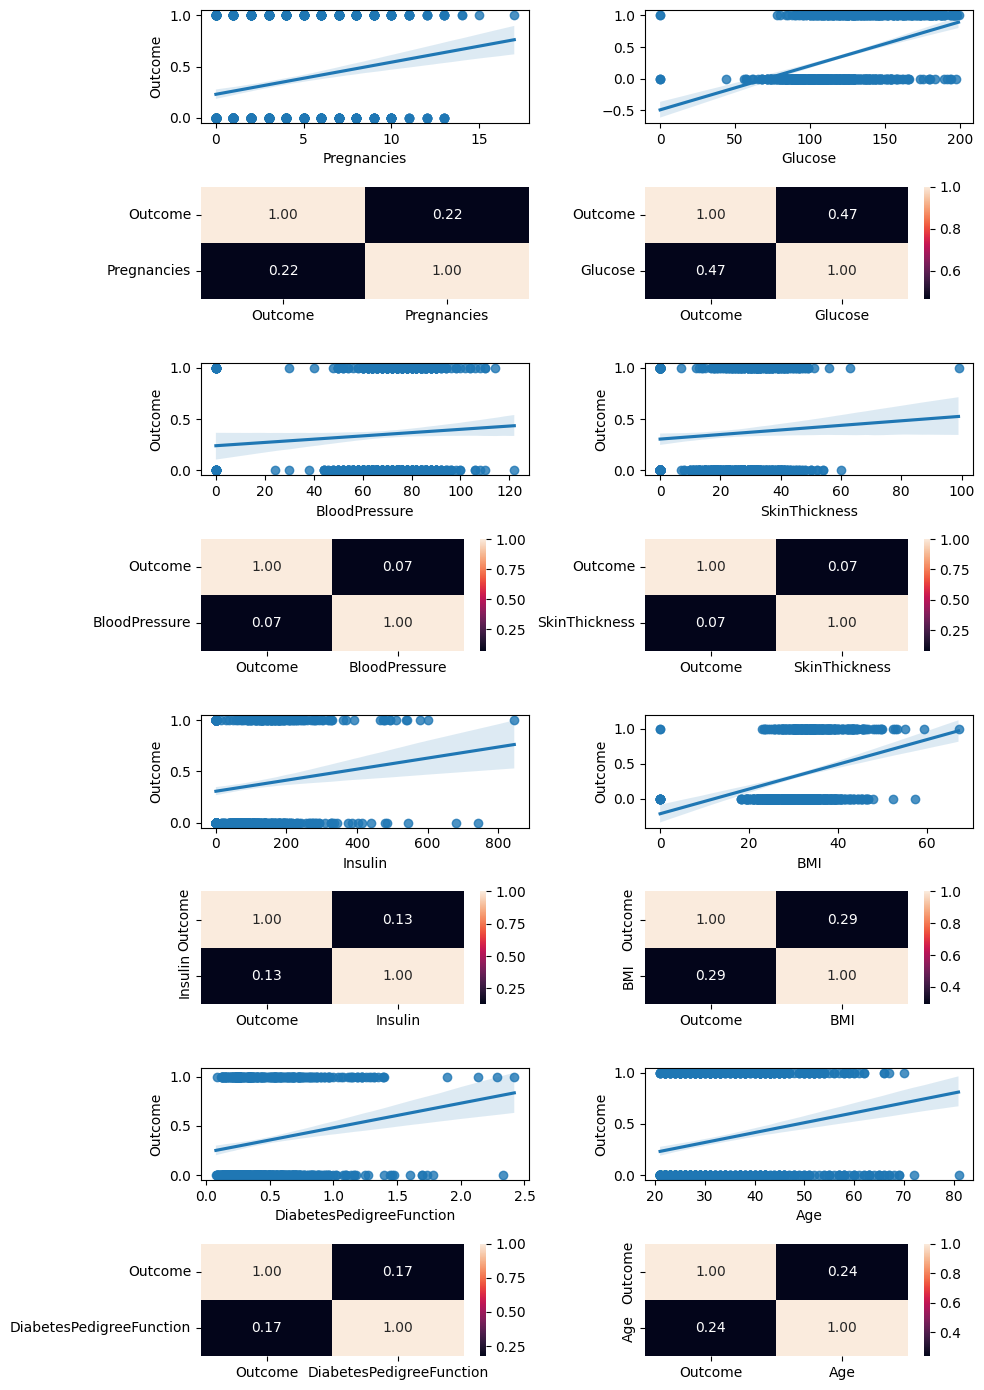

In [224]:
# ANÁLISIS NUMÉRICO BUSCANDO CORRELACIONES ENTRE VARIABLES CON MI VARIABLE OBJETIVO "Outcome"
# ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

fig, axis = plt.subplots(8, 2, figsize = (10, 14))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data, x = "Pregnancies", y = "Outcome")
sns.heatmap(data[["Outcome", "Pregnancies"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data, x = "Glucose", y = "Outcome").set(ylabel=None)
sns.heatmap(data[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = data, x = "BloodPressure", y = "Outcome")
sns.heatmap(data[["Outcome", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2, 1], data = data, x = "SkinThickness", y = "Outcome")
sns.heatmap(data[["Outcome", "SkinThickness"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

sns.regplot(ax = axis[4, 0], data = data, x = "Insulin", y = "Outcome")
sns.heatmap(data[["Outcome", "Insulin"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0])

sns.regplot(ax = axis[4, 1], data = data, x = "BMI", y = "Outcome")
sns.heatmap(data[["Outcome", "BMI"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1])

sns.regplot(ax = axis[6, 0], data = data, x = "DiabetesPedigreeFunction", y = "Outcome")
sns.heatmap(data[["Outcome", "DiabetesPedigreeFunction"]].corr(), annot = True, fmt = ".2f", ax = axis[7, 0])

sns.regplot(ax = axis[6, 1], data = data, x = "Age", y = "Outcome")
sns.heatmap(data[["Outcome", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[7, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Correlación leve entre `Pregnancies`, `Glucose`, `BMI` y `Age` con la variable objetivo `Outcome`

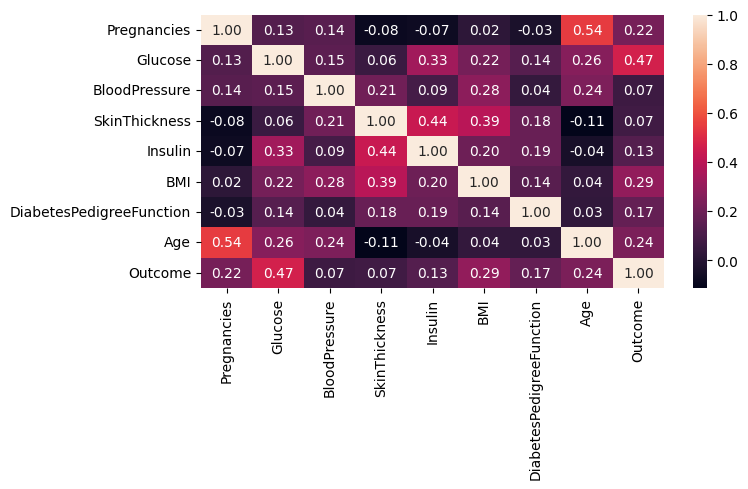

In [225]:
# ANÁLISIS NUMÉRICO - CATEGÓRICO COMPLETO

fig, axis = plt.subplots(figsize = (8, 5))

sns.heatmap(data.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

**CONCLUSIONES**

Del análisis de las correlaciones entre todas las variables podemos extaer que las más relacionadas entre sí son `Pregnancies` con `Age`, `Glucose` con `Outcome` y `SkinThickness` con `BMI` y `Insulin`. Todas correlaciones positivas y que obeecen a patrones lógicos como que a mayo edad mayor cantidad de embarazos o que a mayor concentracion de glucosa mas probable es que haya diabetes.

In [226]:
# LIMPIEZA DE VALORES ATÍPICOS

# "Glucose", valores atipicos en 0
display(data[data["Glucose"] == 0].shape[0])
# Al ser solo 5 valores procedemos a eliminarlos del dataset
data_clean = data[data["Glucose"] != 0]

5

In [227]:
# "BloodPressure", valores atípicos menores de 40 y mayores que 100
condicion = (data_clean["BloodPressure"] < 40) | (data_clean["BloodPressure"] > 100)
# Convertir valores inválidos a NaN
data_clean.loc[condicion, "BloodPressure"] = np.nan
# Cálculo de la mediana
mediana_BloodPressure = data_clean["BloodPressure"].median()
# Reemplazo de NaN con la mediana
data_clean.loc[data_clean["BloodPressure"].isna(), "BloodPressure"] = mediana_BloodPressure

In [228]:
# "SkinThickness", valores atípicos en 0
condicion = data_clean["SkinThickness"] == 0
# Convertir valores inválidos a NaN
data_clean.loc[condicion, "SkinThickness"] = np.nan
# Cálculo de la mediana
mediana_SkinThickness = data_clean["SkinThickness"].median()
# Reemplazo de NaN con la mediana
data_clean.loc[data_clean["SkinThickness"].isna(), "SkinThickness"] = mediana_SkinThickness

In [229]:
# "Insulin", valores atípicos mayores de 500 o iguales a 0
condicion = (data_clean["Insulin"] > 500) | (data_clean["Insulin"] == 0)
# Convertir valores inválidos a NaN
data_clean.loc[condicion, "Insulin"] = np.nan
# Cálculo de la mediana
mediana_Insulin = data_clean["Insulin"].median()
# Reemplazo de NaN con la mediana
data_clean.loc[data_clean["Insulin"].isna(), "Insulin"] = mediana_Insulin

In [230]:
# "BMI", valores atípicos iguales a 0 o mayores de 50
condicion = (data_clean["BMI"] > 50) | (data_clean["BMI"] == 0)
# Convertir valores inválidos a NaN
data_clean.loc[condicion, "BMI"] = np.nan
# Cálculo de la mediana
mediana_BMI = data_clean["BMI"].median()
# Reemplazo de NaN con la mediana
data_clean.loc[data_clean["BMI"].isna(), "BMI"] = mediana_BMI

In [231]:
# TRATAMIENTO DE VALORES FALTANTES
data_clean.isnull().sum().sort_values(ascending=False)
# El dataset en este punto no presenta valores faltantes, como ya habíamos visto al inicio del análisis

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [232]:
# CODIFICACIÓN Y ESCALAMIENTO
# Separación de train y test
X = data_clean.drop("Outcome", axis = 1)
y = data_clean['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [233]:
# Escalado
# Instancio el escalador
scaler = MinMaxScaler()

# Entreno el escalador con los datos de entrenamiento
scaler.fit(X_train)

# Aplico el escalador en ambos
X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = X_train.columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = X_test.columns)

X_train_scal.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
338,0.529412,0.696774,0.633333,0.293478,0.326403,0.503145,0.346318,0.200000
728,0.117647,0.845161,0.800000,0.239130,0.224532,0.147799,0.103596,0.016667
292,0.117647,0.541935,0.633333,0.326087,0.349272,0.789308,0.488014,0.166667
690,0.470588,0.406452,0.666667,0.239130,0.224532,0.201258,0.330479,0.216667
91,0.235294,0.509677,0.666667,0.086957,0.336798,0.433962,0.153682,0.216667


In [234]:
# Selección de parámetros
selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test_scal.columns.values[ix])

X_train_sel.head()

,Pregnancies,Glucose,Insulin,BMI,Age
0,0.529412,0.696774,0.326403,0.503145,0.200000
1,0.117647,0.845161,0.224532,0.147799,0.016667
2,0.117647,0.541935,0.349272,0.789308,0.166667
3,0.470588,0.406452,0.224532,0.201258,0.216667
4,0.235294,0.509677,0.336798,0.433962,0.216667


In [235]:
# modelo
model = DecisionTreeClassifier(random_state = 42)

# entrenamiento
model.fit(X_train_sel, y_train)

DecisionTreeClassifier(random_state=42)

In [236]:
# predicción
y_pred_test = model.predict(X_test_sel)
y_pred_test

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [237]:
y_pred_train = model.predict(X_train_sel)
y_pred_train

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,

In [238]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7058823529411765
F1 score Test:  0.7058823529411765
Precision Test:  0.7058823529411765
Recall Test:  0.7058823529411765
Accuracy Train:  1.0
F1 score Train:  1.0
Precision Train:  1.0
Recall Train:  1.0


**APLICAR GRID SEARCH PARA BUSCAR MEJORES PARAMETROS**

In [239]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [240]:
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # validación cruzada de 5 folds
    scoring='accuracy',  # métrica que quieres optimizar
    n_jobs=-1,  # usa todos los núcleos disponibles
    verbose=1  # para ver el progreso
)

In [241]:
grid_search.fit(X_train_sel, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [242]:
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [243]:
# modelo
model = DecisionTreeClassifier(criterion="entropy", max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=10, random_state = 42)

# entrenamiento
model.fit(X_train_sel, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                       random_state=42)

In [244]:
# predicción
y_pred_test = model.predict(X_test_sel)

In [245]:
y_pred_train = model.predict(X_train_sel)

In [246]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)
print()
print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7450980392156863
F1 score Test:  0.7450980392156863
Precision Test:  0.7450980392156863
Recall Test:  0.7450980392156863

Accuracy Train:  0.819672131147541
F1 score Train:  0.819672131147541
Precision Train:  0.819672131147541
Recall Train:  0.819672131147541


**APLICAR MODELO DE REGRESION LOGISTICA PARA COMPARAR RESULTADOS**

In [247]:
# genera el modelo
model = LogisticRegression()

# entrena
model.fit(X_train_sel, y_train)

LogisticRegression()

In [248]:
# prediccion
y_pred = model.predict(X_test_sel)

In [249]:
accuracy_score(y_test, y_pred)

0.7908496732026143

In [250]:
y_pred_train = model.predict(X_train_sel)

accuracy_score(y_train, y_pred_train)

0.7622950819672131

In [251]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# genera el modelo
model = LogisticRegression()

# Definimos los parámetros que queremos ajustar a mano
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [252]:
grid.fit(X_train_sel, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [253]:
model_grid = LogisticRegression(C = 1, penalty="l1", solver = "liblinear")
model_grid.fit(X_train_sel, y_train)
y_pred = model_grid.predict(X_test_sel)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.7908496732026143

In [254]:
y_pred_train = model_grid.predict(X_train_sel)

accuracy_score(y_train, y_pred_train)

0.7655737704918033

In [255]:
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)
print()
print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7908496732026143
F1 score Test:  0.7908496732026143
Precision Test:  0.7908496732026143
Recall Test:  0.7908496732026143

Accuracy Train:  0.7655737704918033
F1 score Train:  0.7655737704918033
Precision Train:  0.7655737704918033
Recall Train:  0.7655737704918033


**CONCLUSIONES**

Se evaluaron dos modelos con mi set de datos, llegando a la conclusión de que se obtiene algo más de efectividad en este caso con la regresión logística que con el árbol de decisión, a pesar de que este nos da un buen punto de partida y su predicción también tiene métricas aceptables.